## Pandas API and decorators
This library is created for practicing decorators and libraries through Pandas API

In [213]:
import oop
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [214]:
try:
    del pd.DataFrame.missing
except AttributeError:
    pass

In [215]:
@pd.api.extensions.register_dataframe_accessor('missing')
class MissingMethods:
    def __init__(self, pandas_obj):
        self._df = pandas_obj
    
    def number_missing(self) -> int:
        return self._df.isna().sum().sum()
    
    def number_complete(self) -> int:
        return self._df.size - self._df_missing.number_missing()
    
    def missing_variable_summary(self) -> int: #Return a table with all missing values per case
        return self._df.isnull().pipe(
            lambda null_df:(
                null_df.sum() #Return the sum of the values over the requested axis, where null values are present.
                .reset_index(name="n_missing")
                .rename(columns={"index":"variable"})
                .assign( #create two new columns
                    n_cases = len(null_df),
                    percent_missing = lambda df_2 : df_2.n_missing / df_2.n_cases * 100, #Calculates % of missing cases
                )
            )
        )
    
    def missing_case_summary(self) -> pd.DataFrame:
        pass
    
    def missing_variable_table(self) -> pd.DataFrame:
        pass
    
    def missing_case_table(self) -> pd.DataFrame:
        pass
        
    def missing_case_plot(self):
        case = self._df.missing.missing_case_summary().variable
        height = self._df.missing.missing_case_summary().n_missing
        plt.figure(figsize=(5,5))
        sns.barplot(
            x=case, 
            y=height,
            width=0.25
            )
        plt.xlabel('Variable')
        plt.ylabel('Missing percent')
        plt.yticks(range(int(min(height)), int(max(height))+1))
        plt.title('Missing case plot summary')
        plt.show()

In [216]:
df = pd.DataFrame.from_dict(
    data = {
        "a": list("asdfasdfas"),
        "b": range(0, 10)
    }
)

df.iloc[2:5, 0] = None
df.iloc[6:7, 1] = None

df


,a,b
0,a,0.0
1,s,1.0
2,None,2.0
3,None,3.0
4,None,4.0
5,s,5.0
6,d,NaN
7,f,7.0
8,a,8.0
9,s,9.0


In [217]:
df.missing.number_missing()

4

In [218]:
df.missing.missing_case_summary()

,variable,n_missing,n_cases,percent_missing
0,a,3,10,30.0
1,b,1,10,10.0


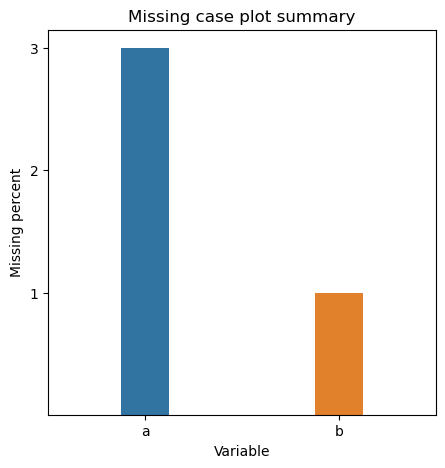

In [219]:
df.missing.missing_case_plot()